In [1]:
import sys; sys.path.insert(0, '../Loop/')

## 1. Get historical data
In this example, we will get historical data from a file which is available in Loop repository. `HistoricalKlinesData` also allows fetching data from the API, or reading in a DataFrame.

In [2]:
from loop.data import HistoricalKlinesData
data = HistoricalKlinesData(data_file_path='../Loop/datasets/BTCUSDT-2022-2024.csv')

## 2. Split the data
For this example, we will split the data so that 80% of the data goes to `train`, 10% goes to `test`, and 10% goes to `validate`.

In [3]:
_ = data.split_data(8, 1, 1)

## 3. Add Features
Next, we will add all the indicators from [ta.add_all_ta_features](https://github.com/bukosabino/ta/blob/master/examples_to_use/all_features_example.py).

In [4]:
from loop.features import Features

features = Features(data)
_ = features.add_features()

## 4. Extract features into separate dataframes
This step is not strictly necessary, but makes the code in the following steps cleaner. Note how we have to remove the first 50 records from the `train` dataset to remove the `NaN` values arising from creating indicators based on a rolling historical window.

In [5]:
train = features.production_features['train'][50:]
test = features.production_features['test']
validate = features.production_features['validate']

## 5. Initiate a model to be used in the experiment
In this example we will simply use one of the placeholder models included in Loop. But you can use any model that follows the Loop single-file model template.

In [6]:
from loop.models import xgboost

## 6. Run the experiment

In [7]:
from loop.experiment import Experiment

experiment = Experiment(train=train,
                        test=test,
                        validate=validate,
                        single_file_model=xgboost)

best_model_params, model, history = experiment.run(metric='val_mae',
                                                   metric_minimize=True,
                                                   n_permutations=10)

100%|████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.50it/s]


## 7. Compare the predictions with the actuals

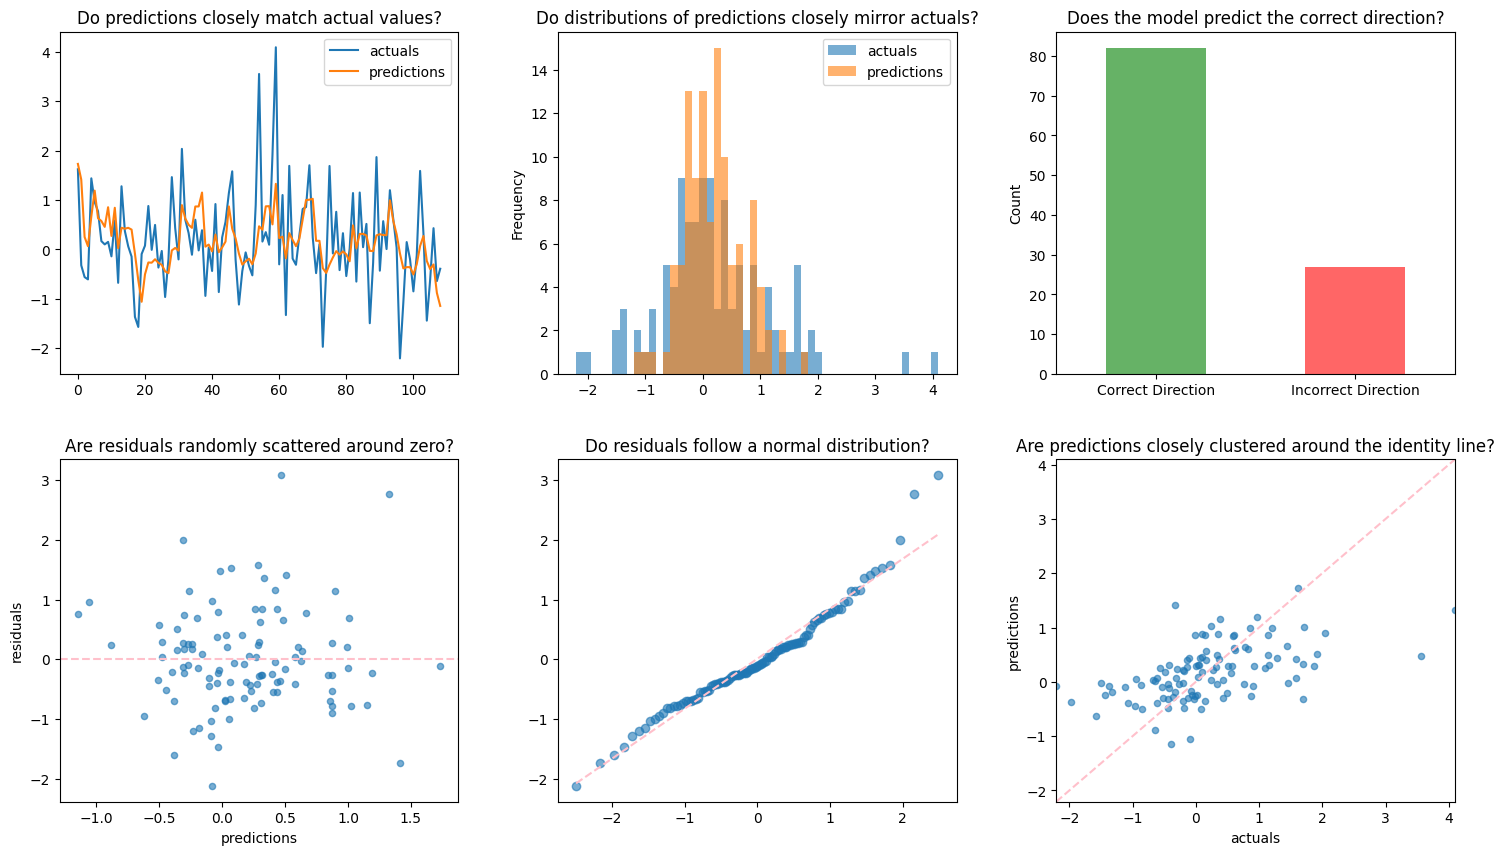

In [8]:
from loop.reports.compare_prediction_with_actual import compare_prediction_with_actual

compare_prediction_with_actual(xgboost.prep, model, validate)